In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"  # specify which GPU(s) to be used
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os.path
import pandas as pd

In [2]:
CTW_labelled = "/Users/hiba/Desktop/Deep Learning/CTW2020_labelled_data/"

In [3]:
def get_data(data_file):
    
    f = h5py.File(data_file, 'r')
    H_Re = f['H_Re'][:] #shape (sample size, 56, 924, 5)
    H_Im = f['H_Im'][:] #shape (sample size, 56, 924, 5)
    SNR = f['SNR'][:] #shape (sample size, 56, 5)
    Pos = f['Pos'][:] #shape(sample size, 3)
    f.close()
            
    return H_Re, H_Im, SNR, Pos        

In [4]:
data_file = CTW_labelled +"file_1.hdf5"
data_file

'/Users/hiba/Desktop/Deep Learning/CTW2020_labelled_data/file_1.hdf5'

In [6]:

H_Re, H_Im, SNR, Pos = get_data(data_file)

print("H_Re is of shape {}".format(H_Re.shape))
print("H_Im is of shape {}".format(H_Im.shape))
print("SNR is of shape {}".format(SNR.shape))
print("Pos is of shape {}".format(Pos.shape))

H_Re is of shape (512, 56, 924, 5)
H_Im is of shape (512, 56, 924, 5)
SNR is of shape (512, 56, 5)
Pos is of shape (512, 3)


In [7]:
H_Re=np.array(H_Re)
H_Im=np.array(H_Im)
SNR=np.array(SNR)
Pos=np.array(Pos)
H_Re.size

132464640

In [8]:
hf = h5py.File(data_file, 'r')
data = hf.get(data_file)# `data` is now an ndarray.


In [9]:
import tarfile
import urllib
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from numpy import linalg

In [10]:

H_Re=H_Re[[1,2,3,4,5,6,7,8,9,10],:,:,:]
H_Im=H_Im[[1,2,3,4,5,6,7,8,9,10],:,:,:]
SNR=SNR[[1,2,3,4,5,6,7,8,9,10],:,:]
Pos=Pos[[1,2,3,4,5,6,7,8,9,10],:]

print("H_Re is of shape {}".format(H_Re.shape))
print("H_Im is of shape {}".format(H_Im.shape))
print("SNR is of shape {}".format(SNR.shape))
print("Pos is of shape {}".format(Pos.shape))

H_Re is of shape (10, 56, 924, 5)
H_Im is of shape (10, 56, 924, 5)
SNR is of shape (10, 56, 5)
Pos is of shape (10, 3)


In [11]:

H_Re_new=np.reshape(H_Re, (10*5,56*924))
H_Im_new=np.reshape(H_Im, (10*5,56*924))# check the reshape with one example
SNR_new=np.reshape(SNR, (10*5,56))
H=np.concatenate((H_Re_new,H_Im_new,SNR_new),axis=1)
print(H.shape)
Pos=np.repeat(Pos,5,axis=0) #to indicate points for the five trials
print(Pos.shape)

(50, 103544)
(50, 3)


In [12]:

W2= np.random.normal(0, 1,  (103,103544))
W3 = np.random.normal(0, 1,(3,103))
W4 = 0.5*np.random.normal(0, 1,(3,3))

b2 = 0.5*np.random.normal(0, 1,(103,1))
b3 = 0.5*np.random.normal(0, 1,(3,1))
b4 = 0.5*np.random.normal(0, 1,(3,1))

print("W2= ",W2)
print("W3= ",W3)
print("W4= ",W4)
print("b2= ",b2)
print("b3= ",b3)
print("b4= ",b4)



W2=  [[-0.14620548 -1.77241432 -0.36168286 ... -0.54016085  1.51652435
   2.39865003]
 [ 0.4926466  -0.09739686 -0.81244714 ... -2.1569687  -0.96399045
   0.32530538]
 [ 0.13574207  1.02570107 -0.76759769 ...  0.75866975 -0.69718736
  -0.83794408]
 ...
 [ 0.08057414 -2.02232452 -0.30771495 ...  1.61261812 -0.81314089
   0.94365064]
 [ 0.32720168  1.80934281  0.5711663  ... -0.11624013 -1.16052145
   0.25503964]
 [-1.17111793  1.01704254 -0.29323285 ...  0.68086799  0.50563034
   0.44823739]]
W3=  [[-1.11004688 -1.53659167 -0.89052932  0.22409231  1.11680807 -0.18676393
  -0.41985926 -1.49575502 -0.64215749 -0.74540662  0.09321416  0.12719583
  -0.75529771 -0.50682099  0.94052203  0.2072236   0.32980267 -0.91612273
   0.5556706   0.80213392 -0.38491089  1.41053033  0.65534711 -0.96162187
   0.44278122 -1.24208847 -0.10484718 -0.54490108 -0.49323142  0.29105054
  -1.46961586  0.15083363  0.37106686 -1.6269679  -1.36239694 -1.13936758
   2.45651813  0.44643555 -0.5964721   1.03770121  1.0

In [13]:
eta = 0.05        # learning rate       
Niter = 500     #number of SG iterations 1e6
savecost = np.zeros(int(Niter)) # value of cost function at each iteration




In [14]:
def activate(x,W,b):
    return 1/(1+np.exp(-(W.dot(x)+b)))

In [15]:
def cost(W2,W3,W4,b2,b3,b4):
    costvec = np.zeros(50);
    for i in range (50):
        x = H[i,:]
        a2 = activate(x,W2,b2)
        a3 = activate(a2,W3,b3)
        a4 = activate(a3,W4,b4)
        d=Pos[i,:].reshape(3,1)- a4
        costvec[i] = np.linalg.norm(d)
    return np.linalg.norm(costvec)*np.linalg.norm(costvec) #np.linalg.norm for euclbidean norm

In [16]:

for counter in range(Niter):
    k = random.randint(0,49)      # choose a training point at random
    x = H[k,:].reshape(103544,1);
    #forward pass
    a2 = activate(x,W2,b2)
    a3 = activate(a2,W3,b3)
    a4 = activate(a3,W4,b4)
    # Backward pass
    delta4 = np.multiply(np.multiply(a4,(1-a4)),(a4-Pos[k,:].reshape(3,1)))#np.multiply for element wise vector multi
    delta3 =np.multiply(np.multiply(a3,(1-a3)),(W4.T.dot(delta4)))
    delta2 = np.multiply(np.multiply(a2,(1-a2)),(W3.T.dot(delta3)))
    #gradient step
    W2 = W2 - eta*delta2.dot(x.reshape(1,103544))
    W3 = W3 - eta*delta3.dot(a2.T)
    W4 = W4 - eta*delta4.dot(a3.T)
    b2 = b2 - eta*delta2;
    b3 = b3 - eta*delta3;
    b4 = b4 - eta*delta4;
    newcost = cost(W2,W3,W4,b2,b3,b4)
    savecost[counter] = newcost
    

/Users/hiba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


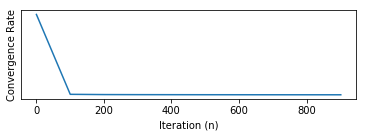

In [38]:

#emilogy([1:1e4:Niter`],savecost(1:1e4:Niter))
a= np.arange(1,Niter, 100)


fig = plt.figure()
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('Convergence')
ax1.set_xlabel('Iteration (n)')


line, =ax1.semilogy(a, savecost[a])
plt.show()

In [43]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [50]:
model = models.Sequential()
model.add(layers.Conv2D(32,(5,5),activation='relu', input_shape=(512,56,924)))
model.add(layers.MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 508, 52, 32)       739232    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 254, 26, 32)       0         
Total params: 739,232
Trainable params: 739,232
Non-trainable params: 0
_________________________________________________________________
